In [130]:
# We created a 'class' for the project 
# in order to improve the cleannes and readability

class Project:
    def __init__(self):
        import numpy as np
        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.datasets import make_classification
        from itertools import combinations 

# Data is loaded through pandas.        
        
        self.train_x = pd.read_csv('data/training_data.csv', header=None)
        self.test_x = pd.read_csv('data/test_data.csv', header=None)
        self.train_y = pd.read_csv('data/training_labels.csv', header=None)
        
        self.train_x2count = self.train_x.apply(pd.Series.value_counts)
        self.train_x2clean = self.train_x2count.fillna(0).transpose()     
        
        self.train_xcount = self.train_x.apply(pd.Series.value_counts)
        self.train_xcount = self.train_xcount.transpose()
        self.train_xcount = self.train_xcount.sum()
# Here we defined a 'plot' function. 
# This function's main purpose is to show
# Plots either have been asked in
# instructions and to be able to analyse
# the project.

    def plot(self, plot):
        
# This one helps us to find
# the ten most purchased products
# in pie chart.

        if plot == 'largest_pie':
            self.train_xcount = self.train_x.apply(pd.Series.value_counts)
            self.train_xcount = self.train_xcount.transpose()
            self.train_xcount = self.train_xcount.sum()
            self.piechart = pd.DataFrame(self.train_xcount)
            self.piechart = self.piechart.rename(columns = {0:'Count'})

            self.top_10 = self.piechart.nlargest(10, 'Count')
            self.pieplot = self.top_10.plot.pie (y = 'Count', figsize = (5,5))
            self.pieplot.legend(bbox_to_anchor=(1.2,1.025), loc="upper left")
            
            return self.pieplot

# This one helps us to find
# the ten most purchased products
# in bar plot. As discussed 
# with Dennis earlier, this type of 
# plotting can be used interchangibly 
# with a histogram. Also we thought that
# bar plot is more effective since
# it's main reason is to compare sets 
# of data between different groups at a glance.
# Therefore it is closer to what 
# we want to see.
        
        elif plot == 'bar_plot':
            self.piechart = pd.DataFrame(self.train_xcount)
            self.piechart = self.piechart.rename(columns = {0:'Count'})
            top_10 = self.piechart.nlargest(10, 'Count')
            self.bar = top_10.plot.bar()
            self.bar.legend(bbox_to_anchor=(1.2,1.025), loc="upper left")
            return self.bar

# This one helps us to find
# the ten least purchased products
# in pie chart. There are two reasons
# why we choose to use this chart. 
# First, we can learn what is the least 
# purchased product (Water Spray) 
# which is the answer 
# for another task. Secondly, learning 
# the least purchased products may be 
# needed for the company as they can 
# decide whether to bring the right
# quantity to the supermarket next time.

        elif plot == 'smallest_pie':
            self.smallpiechart = pd.DataFrame(self.train_xcount)
            self.smallpiechart = self.smallpiechart.rename(columns = {0:'Count'})

            self.top_10 = self.smallpiechart.nsmallest(10, 'Count')
            self.smallpieplot = self.top_10.plot.pie (y = 'Count', figsize = (5,5))
            self.smallpieplot.legend(bbox_to_anchor=(1.2,1.025), loc="upper left")

# Also we thought that making a scatter plot
# can be needed to see the shape of 
# the frequency of purchase of each product.
# Therefore, with the help of that the company 
# can define several thresholds to group their products.
            
        elif plot == 'scatter_plot':
            self.train_xcount = self.train_xcount.sort_values()
            self.scatter = self.train_xcount.plot()

# Lastly, wrote a message in case of an invalid plot inquiry.
            
        else:
            return 'Please enter a valid plot: largest_pie, bar_plot, smallest_pie, scatter_plot'

# In order to make one hot encoding, we created a dataframe with full of zeros.  

    def OneHotEncode(self):
        self.OneHot_array = np.zeros((6751,120))
        self.OneHot_df = pd.DataFrame(self.OneHot_array)        

# Selecting the products and reshape them in order to merge with the aforementioned dataframe.        
        
        self.a = self.train_x2clean.columns.values.reshape(1,120)
        self.a= pd.DataFrame(self.a)

# Concatenating the two dataframe.        
        
        self.frames = [self.a, self.OneHot_df]
        self.result = pd.concat(self.frames)
        
# Make the products as columns of this dataframe, and drop them from their row.     
    
        self.result.columns = self.result.iloc[0]
        self.result = self.result.drop(self.result.index[0])
                
        
        self.c = self.result.columns
        self.c_np = np.array(self.c)
        self.c_df = pd.DataFrame(self.c_np)
        
        self.result_test2 = self.result
        print ('Loop Started')

# Loop for one hot encoder

        for i in range(len(self.train_x)):
            for items in range(19):
                if self.train_x.iloc[i,items] == 'nan':
                    pass
                else:
                    for r in range(119):
                        if self.train_x.iloc[i,items] == self.c_df.iloc[r,0]:
                            self.result_test2.iloc[i,r] = 1
                    ++r
            ++items
        if i%250 == 0:
            print ('Processing...')
        ++i
        return 'Completed'
    
    
    
# First, we believed that Supervised Learning is the suitable option
# for the dataset because our function has also training labels. 
# Later, as a sub-group of categorical learning, 
# we find Random Forest as the most suitable method to implement.

    def CreateModel(self, Algorithm):
        if Algorithm == 'RandomForrest':
            self.train_ynp = np.array(self.train_y).reshape((-1))
            self.model_RF = RandomForestClassifier(n_estimators=100)
            self.model_RF = model_RF.fit(self.result_test2,self.train_ynp)
            self.features = pd.DataFrame(model_RF.feature_importances_)
            self.features = self.features.sort_values(by=[0]).reset_index(drop=True).rename(columns={0:'Importance'})
            self.scatter = self.features.plot()
            features
        else:
            return 'Please enter a Algorithm: RandomForrest'
        
    def Predict(self):
        self.pred = model_RF.predict(self.test_set)
        self.pred_df = pd.DataFrame(self.pred) #inputted test data for submission
        self.pred_df.to_csv(r'C:\Users\Nicholas.Smith\TU Berlin\Project\Pred.csv')
        count = 0
        for i in range(len(self.pred_df2)):
            if pred_df2.iloc[i,0] == train_y.iloc[i,0]:
                count = count + 1
        accuracy = count/len(pred_df2)
        
        #Outputs
        print ('Training True Count= ', count)
        print ('Training Accuracy= ', accuracy)
        print ('Analysis run, please use the Export_Results method to save a csv')
        print ('pred_df')

#    def Export_Results(self, path):
#        self.pred_df.to_csv(.to_csv(path + 'Results.csv')            
#        print ('Results Exported')              

In [131]:
import pandas as pd
import numpy as np

In [132]:
Test2 = Project()

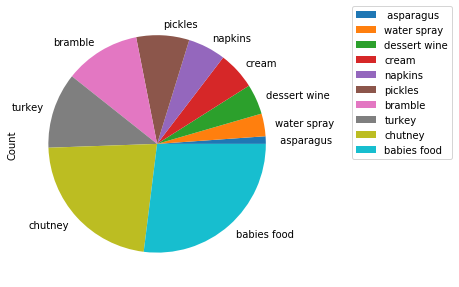

In [133]:
Test2.plot('smallest_pie')

In [ ]:
for z in range(len(self.test_x)):
    for p in range(19):
        if self.test_x.iloc[z,p] == 'nan':
            pass
        else:
            for q in range(119):
                if self.test_x.iloc[z,p] == self.c_df.iloc[q,0]:
                    self.test_set.iloc[z,q] = 1
            ++q
        ++p
    if z%250 == 0:
        print ('working')
    ++z
print ('Finished')